# <center><u> PROJECT-1</u></center>

**<u><i>DEFINE RESEARCH GOAL</i></u><br>**

**The goal of the project is to detect whether a transaction is a normal payment or a fraud.<br>
The dataset contains two-day transactions by European cardholders during September 2013.<br>
The dataset contains 284,807 transactions out of which 492 were fraud cases.<br>
Due to the privacy reasons, the dataset has been anonymized. The feature names have also been changed (V1, V2, V3, etc.).**

**<i><u>IMPORT PYTHON PACKAGE</u></i>**<br>

**In this step, we start working on the problem<br>
First of all, we need to load the libraries, packages, and functions for developing the model.**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [6]:
a=pd.read_csv('creditcard.csv.zip')
a

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**<u><i>UNDERSTANDING THE DATA</i></u>**<br>

**The most important step of model development is understanding the dataset. Generally, we follow the following steps to understand the data:**

***(a) View the raw data***

In [3]:
pd.set_option('display.width',100)
a.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
a.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


***(b) The dimension of the data***

In [5]:
a.shape

(284807, 31)

***(c) The Data Types of the attributes***

In [6]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Our observations are as follows**<br>
1) NaN values do not present in the data set. Because of the Non-Null Count and number of rows in the dataset match.<br>
2) There are 29 Input Variables and 1 Output Variable (Class).<br>
3) The data type of all the input variables is float64 whereas the data type of out variable (Class) is int64.

***(d) Count of Null Values***

In [8]:
a.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The dataset does not contain any null values.

**<u>Expolatory Data Analysis</u>**<br>
***(e) Statistical Analysis of data***

In [8]:
pd.set_option('precision',2)
a.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,...,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,284807.00,2.85e+05
mean,94813.86,3.92e-15,5.69e-16,-8.77e-15,2.78e-15,-1.55e-15,2.01e-15,-1.69e-15,-1.93e-16,-3.14e-15,...,1.54e-16,7.96e-16,5.37e-16,4.46e-15,1.45e-15,1.70e-15,-3.66e-16,-1.21e-16,88.35,1.73e-03
std,47488.15,1.96e+00,1.65e+00,1.52e+00,1.42e+00,1.38e+00,1.33e+00,1.24e+00,1.19e+00,1.10e+00,...,7.35e-01,7.26e-01,6.24e-01,6.06e-01,5.21e-01,4.82e-01,4.04e-01,3.30e-01,250.12,4.15e-02
min,0.00,-5.64e+01,-7.27e+01,-4.83e+01,-5.68e+00,-1.14e+02,-2.62e+01,-4.36e+01,-7.32e+01,-1.34e+01,...,-3.48e+01,-1.09e+01,-4.48e+01,-2.84e+00,-1.03e+01,-2.60e+00,-2.26e+01,-1.54e+01,0.00,0.00e+00
25%,54201.50,-9.20e-01,-5.99e-01,-8.90e-01,-8.49e-01,-6.92e-01,-7.68e-01,-5.54e-01,-2.09e-01,-6.43e-01,...,-2.28e-01,-5.42e-01,-1.62e-01,-3.55e-01,-3.17e-01,-3.27e-01,-7.08e-02,-5.30e-02,5.60,0.00e+00
50%,84692.00,1.81e-02,6.55e-02,1.80e-01,-1.98e-02,-5.43e-02,-2.74e-01,4.01e-02,2.24e-02,-5.14e-02,...,-2.95e-02,6.78e-03,-1.12e-02,4.10e-02,1.66e-02,-5.21e-02,1.34e-03,1.12e-02,22.00,0.00e+00
75%,139320.50,1.32e+00,8.04e-01,1.03e+00,7.43e-01,6.12e-01,3.99e-01,5.70e-01,3.27e-01,5.97e-01,...,1.86e-01,5.29e-01,1.48e-01,4.40e-01,3.51e-01,2.41e-01,9.10e-02,7.83e-02,77.16,0.00e+00
max,172792.00,2.45e+00,2.21e+01,9.38e+00,1.69e+01,3.48e+01,7.33e+01,1.21e+02,2.00e+01,1.56e+01,...,2.72e+01,1.05e+01,2.25e+01,4.58e+00,7.52e+00,3.52e+00,3.16e+01,3.38e+01,25691.16,1.00e+00


In [9]:
pd.set_option('precision', 2)
a.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.48e+04,47488.15,0.00,54201.50,8.47e+04,139320.50,172792.00
V1,284807.0,3.92e-15,1.96,-56.41,-0.92,1.81e-02,1.32,2.45
V2,284807.0,5.69e-16,1.65,-72.72,-0.60,6.55e-02,0.80,22.06
V3,284807.0,-8.77e-15,1.52,-48.33,-0.89,1.80e-01,1.03,9.38
V4,284807.0,2.78e-15,1.42,-5.68,-0.85,-1.98e-02,0.74,16.88
V5,284807.0,-1.55e-15,1.38,-113.74,-0.69,-5.43e-02,0.61,34.80
V6,284807.0,2.01e-15,1.33,-26.16,-0.77,-2.74e-01,0.40,73.30
V7,284807.0,-1.69e-15,1.24,-43.56,-0.55,4.01e-02,0.57,120.59
V8,284807.0,-1.93e-16,1.19,-73.22,-0.21,2.24e-02,0.33,20.01
V9,284807.0,-3.14e-15,1.10,-13.43,-0.64,-5.14e-02,0.60,15.59


**<u>Response Variable Analysis</u>**<br>
**Fraud vs Non-Fraud**

In [10]:
b= {0:'Not Fraud', 1:'Fraud'}
print(a.Class.value_counts().rename(index = b))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


**<u><i>SPLIT THE DATA TO TRAINING DATA AND TESTING DATA</i></u>**<br>

Before fitting the data into the machine learning model, we should split the data into training data and testing data. This is an important step because we would like to train the model by fitting the training data. But to test the data, we should use the data that is new to the model. Then only we would be able to calculate the performance of the model on the unseen data.<br>
We use **sklearn.model_selection.train_test_split()** method for Train Test Split.<br>

The first parameter of the train_test_split is **test_size** which specifies the ratio of data in the train dataset and test dataset. The value 1/3 will put one-third values in the test data set and two-thirds values in the training data set.<br>

The second parameter is **random_state**. Before splitting the data into training and test datasets, the data is randomly shuffled. By giving a value for the random state we ensure, the data is shuffled in a similar way every time so that you get the consistent training and test dataset.

The third parameter is **stratify**. Stratify parameter ensures that the proportion of values in the training and test data set will be the same as the proportion of values in the master dataset. For example, if variable y is a binary categorical variable with values 0 and 1.Suppose there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

Before splitting the data in Training and Test Dataset, we need to split the data in X and y variables.

The variable "Class" is out output variable "y" and rest of the variables are input variables "X"

In [11]:
from sklearn.model_selection import train_test_split
y= a["Class"]
X = a.loc[:, a.columns != 'Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

# **<u><i>DATA MODELLING</i></u>**

In this step, we will evaluate different machine learning models.<br>
We will use Linear as well as Non-Linear Algorithms for this evaluation.

- **<u><i>LOGISTIC REGRESSION</i></u>**

In [12]:
#Import Library for Accuracy Score
from sklearn.metrics import accuracy_score

#Import Library for Logistic Regression
from sklearn.linear_model import LogisticRegression

#Initialize the Logistic Regression Classifier
logisreg = LogisticRegression()

#Train the model using Training Dataset
logisreg.fit(X_train, y_train)

# Prediction using test data
y_pred = logisreg.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_logisreg = round(accuracy_score(y_test, y_pred) * 100, 2)
print( 'Accuracy of Logistic Regression model : ',acc_logisreg)

Accuracy of Logistic Regression model :  99.91


C:\Users\EKANSHI SINGHAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- **<u><i>LINEAR DISCRIMINANT ANALYSIS</i></u>**

In [13]:
#Import Library for Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Initialize the LDA Classifier
model = LinearDiscriminantAnalysis()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_lda = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Linear Discriminant Analysis Classifier: ', acc_lda )

Accuracy of Linear Discriminant Analysis Classifier:  99.93


- **<u><i>GAUSSIAN NAIVE BAYES</i></u>**

In [14]:
#Import Library for Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Initialize the Gaussian Naive Bayes Classifier
model = GaussianNB()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_ganb = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes : ', acc_ganb )

Accuracy of Gaussian Naive Bayes :  99.28


- **<u><i>DECISION TREE</i></u>**

In [15]:
#Import Library for Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_dtree = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Decision Tree Classifier : ', acc_dtree)

Accuracy of  Decision Tree Classifier :  99.91


- **<u><i>RANDOM FOREST</i></u>**

In [16]:
#Import Library for Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialize the Random Forest
model = RandomForestClassifier()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_rf = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Random Forest : ', acc_rf)

Accuracy of  Random Forest :  99.95


- **<u><i>SUPPORT VECTOR MACHINE MODEL</i></u>**

In [17]:
#Import Library for Support Vector Machine Model
from sklearn import svm

#Initialize the Support Vector Classifier
model = svm.SVC()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_svc = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Support Vector Classifier: ', acc_svc)

Accuracy of  Support Vector Classifier:  99.83


- **<u><i>K-NEAREST NEIGHBOUR METHOD</i></u>**

In [18]:
#Import Library for K Nearest Neighbour Model
from sklearn.neighbors import KNeighborsClassifier

#Initialize the K Nearest Neighbour Model with Default Value of K=5
model = KNeighborsClassifier()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_knn = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  KNN Classifier: ', acc_knn)

Accuracy of  KNN Classifier:  99.83


**<u>MODEL SELECTION</u>**

We have no idea which algorithms will do well on this problem. Let’s design our test now. We have used a number of models to fit Y against X. We will evaluate algorithms using the accuracy metric, which is one of the measures of the model performance. We can compare the accuracy of all the models and choose the one with the maximum accuracy.

In [19]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,99.95
1,Linear Discriminant Analysis,99.93
0,Logistic Regression,99.91
3,Decision Tree,99.91
5,Support Vector Machines,99.83
6,K - Nearest Neighbors,99.83
2,Naive Bayes,99.28


We can select the **Random Forest** as it has given us the maximum accuracy.

**<u><i>CONFUSION MATRIX</i></u>**

In our project, Random Forest gave the best accuracy. Hence we can analyze the confusion matrix for Random Forest

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[94772,     0],
       [  160,     4]], dtype=int64)

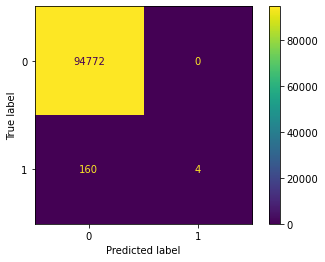

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

In this case, overall accuracy is strong, but the confusion metrics tell a different story. Despite the high accuracy level, 36 out of 164 instances of fraud are missed and incorrectly predicted as nonfraud. The false-negative rate is substantial. The intention of a fraud detection model is to minimize these false negatives.


# **<center><i><u>THANK YOU</u></i></center>**